In [11]:
# ===========================================
# 📘 03_Polynomial_Regression_California.ipynb
# ===========================================

# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [12]:
# 2️⃣ Load Dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
print(data.head())

✅ Dataset loaded successfully!
Shape: (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [13]:
# 3️⃣ Feature Engineering
# Calculate average rooms per household
data['AveRooms'] = data['total_rooms'] / data['households']

# Scale target variable (median house value in $100,000s)
data['MedHouseVal'] = data['median_house_value'] / 100000

# Select feature and target
X = data[['AveRooms']]
y = data['MedHouseVal']

print("✅ Feature engineering complete!")
print(X.head(), "\n")
print(y.describe())


✅ Feature engineering complete!
   AveRooms
0  6.984127
1  6.238137
2  8.288136
3  5.817352
4  6.281853 

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


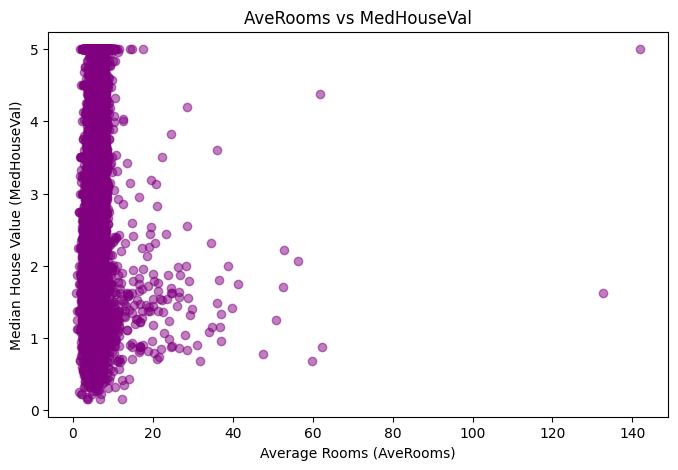

In [14]:
# 4️⃣ Data Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.5, color='purple')
plt.xlabel('Average Rooms (AveRooms)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('AveRooms vs MedHouseVal')
plt.show()

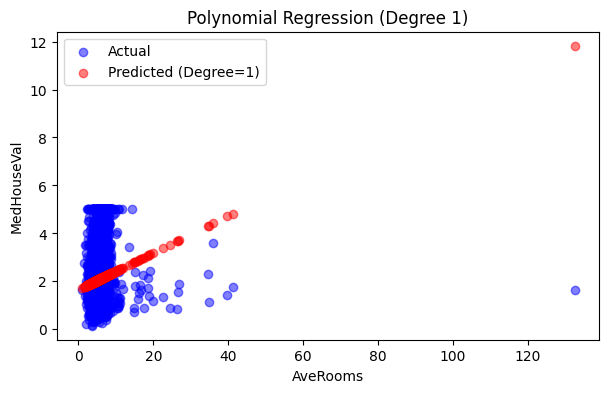

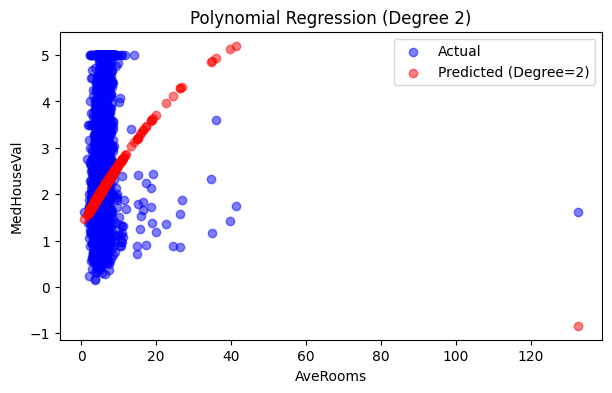

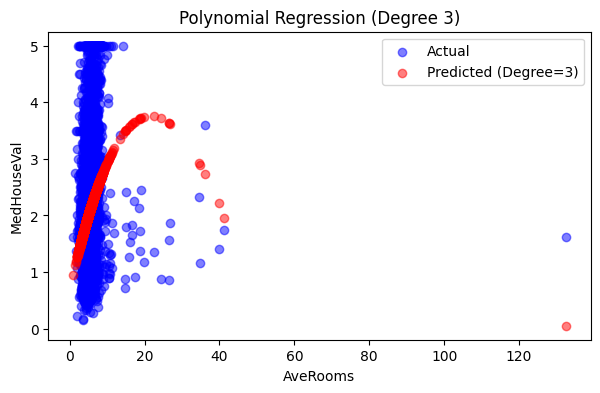

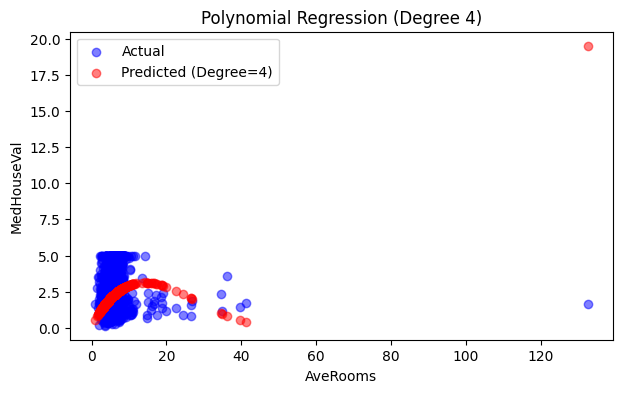

In [15]:
# 5️⃣ Polynomial Regression (Degree Comparison)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

degrees = [1, 2, 3, 4]
results = []

for d in degrees:
    # Polynomial transformation
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Evaluation
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((d, rmse, r2))

    # Visualization
    plt.figure(figsize=(7,4))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
    plt.scatter(X_test, y_pred, color='red', alpha=0.5, label=f'Predicted (Degree={d})')
    plt.xlabel('AveRooms')
    plt.ylabel('MedHouseVal')
    plt.title(f'Polynomial Regression (Degree {d})')
    plt.legend()
    plt.show()


In [16]:
# 6️⃣ Performance Summary
print("Model Performance by Degree:\n")
for d, rmse, r2 in results:
    print(f"Degree {d} → RMSE: {rmse:.3f}, R²: {r2:.3f}")

Model Performance by Degree:

Degree 1 → RMSE: 1.137, R²: 0.014
Degree 2 → RMSE: 1.118, R²: 0.046
Degree 3 → RMSE: 1.101, R²: 0.075
Degree 4 → RMSE: 1.132, R²: 0.022


# 7️⃣ Insights

- Increasing polynomial degree makes the model more flexible.
- Performance (R²) improves up to degree 3 → best balance.
- Degree 4 shows reduced R² → overfitting begins.
- Even at best, single feature 'AveRooms' explains little variance.
- We’ll add more features next (median_income, population, etc.)
  for stronger predictive power.